<a href="https://colab.research.google.com/github/TheScienceUniverse/Agro_GIS/blob/master/Agro_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Full GitHub Repository Here
!pwd
!ls
!rm -rf Agro_GIS
!git clone https://github.com/TheScienceUniverse/Agro_GIS.git

/content
Agro_GIS  sample_data
Cloning into 'Agro_GIS'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 151 (delta 27), reused 0 (delta 0), pack-reused 100
Receiving objects: 100% (151/151), 4.50 MiB | 7.36 MiB/s, done.
Resolving deltas: 100% (70/70), done.


1024 1024 4


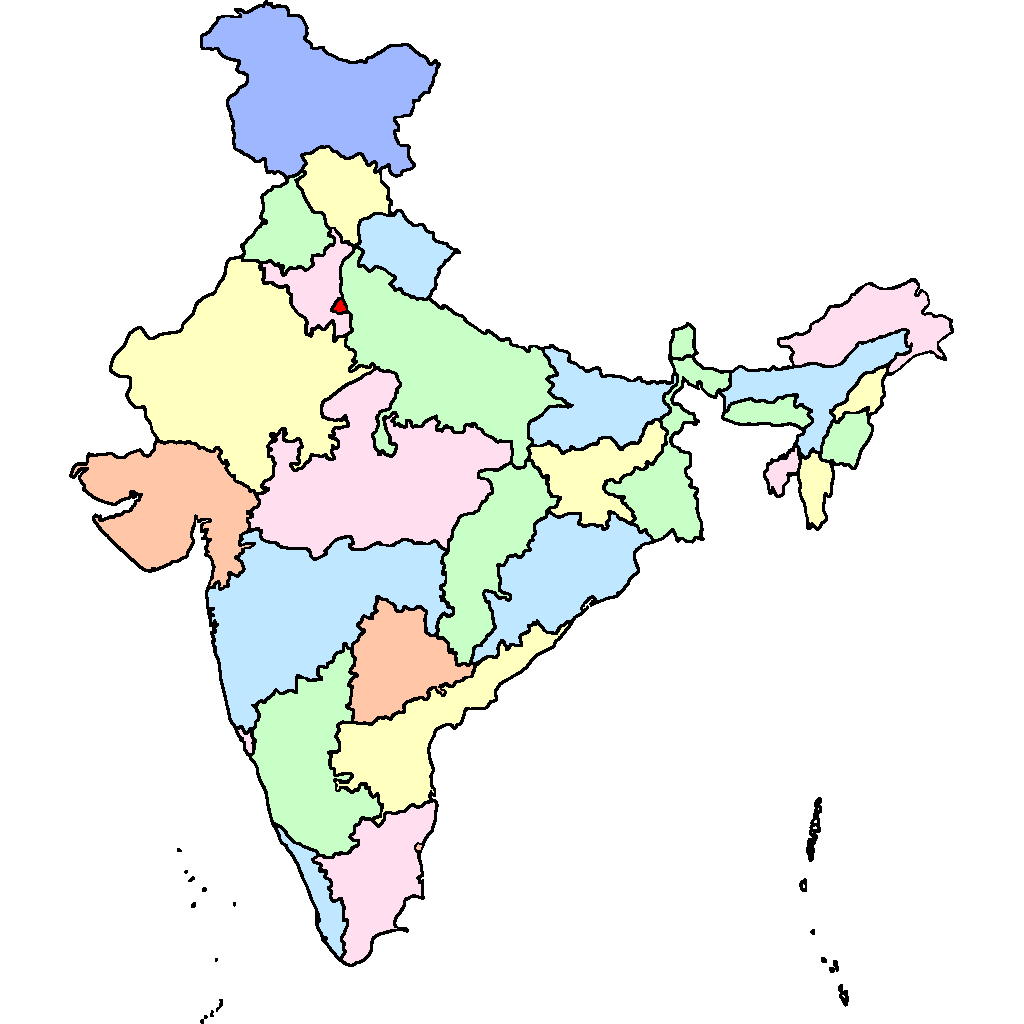

In [2]:
import sys as p_ss
import numpy as p_np
import cv2 as p_cv
from matplotlib import pyplot as p_pt
import csv
# from Agro_GIS.mylib import mylib as p_ml

def read_csv(f_nm):
	data = []
	with open(f_nm, 'r') as csv_f:
		csv_r = csv.reader(csv_f, delimiter=',')
		for row in csv_r:
			data.append(row)
	csv_f.close()
	return data

def str2arr(A):
	A = A.split(',')
	A = [int(i) for i in A]
	return A

def comp_col(c0, c1):
	return c0[0] == c1[0] and c0[1] == c1[1] and c0[2] == c1[2]
    
class Queue:
	def __init__(self):
		self.items = []
	def is_empty(self):
		return self.items == []
	def enQueue(self, data):
		self.items.append(data)
	def deQueue(self):
		return self.items.pop(0)

def flood_fill (p, c):
	c.append(255)
	Q = Queue()
	Q.enQueue(p)
	while (not Q.is_empty()):
		p = Q.deQueue()
		if img[p[0]][p[1]][3] == 0:
			img[p[0]][p[1]] = c
			Q.enQueue([p[0] - 1, p[1] - 1])
			Q.enQueue([p[0] - 1, p[1]])
			Q.enQueue([p[0] - 1, p[1] + 1])
			Q.enQueue([p[0], p[1] - 1])
			Q.enQueue([p[0], p[1] + 1])
			Q.enQueue([p[0] + 1, p[1] - 1])
			Q.enQueue([p[0] + 1, p[1]])
			Q.enQueue([p[0] + 1, p[1] + 1])

img = p_cv.imread('Agro_GIS/img/india.png', -1)
ih, iw, ic = img.shape
print(ih, iw, ic)
            
D = read_csv('Agro_GIS/data/india.csv')
for i in range(1, 37, 1):
	p = str2arr(D[i][11])
	c = str2arr(D[i][12])
	# print(p, c)
	c = [c[2], c[1], c[0]]
	flood_fill([p[0] - 1, p[1] - 1], c)

ret = p_cv.imwrite('./Agro_GIS/img/output.png', img)

from IPython.display import Image
Image('./Agro_GIS/img/output.png', width=512, height=512)